In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from numpy import trapz
from scipy.stats import mannwhitneyu, wilcoxon

In [32]:

output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/Area Under the Curve'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
auc_metrics = pd.read_csv(os.path.join(output_path,'auc metrics pre_post.csv'), index_col=0)
auc_metrics['mouse'] = auc_metrics['session'].apply(lambda x: x[:4])
auc_metrics['cfa'] = auc_metrics['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')  
auc_metrics_pre = auc_metrics.loc[auc_metrics['pre/post']=='pre']
auc_metrics_post = auc_metrics.loc[auc_metrics['pre/post']=='post']
auc_metrics_last = auc_metrics.loc[auc_metrics['session'].str.contains('CFA')|auc_metrics['session'].isin(last_session)]
auc_metrics_pre.head()

,session,modality,pre/post,mean auc,mouse,cfa
0,2P06_Ses01,warm,pre,0.102575,2P06,health
2,2P06_Ses01,hot,pre,0.090654,2P06,health
4,2P06_Ses01,opto,pre,0.091756,2P06,health
6,2P06_Ses01,off-target,pre,0.091933,2P06,health
8,2P06_Ses01,von frey,pre,0.087278,2P06,health


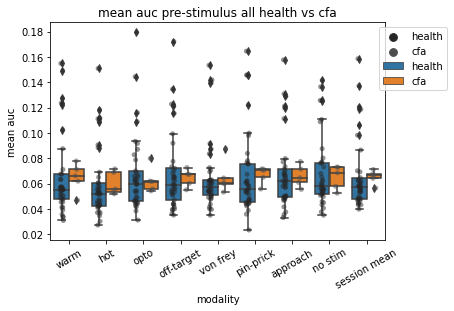

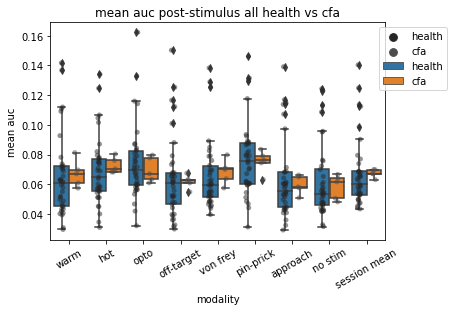

In [33]:
# PLOT MEAN AUC BASELINE ALL SESSIONS HEALTH VS CFA 
ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc pre-stimulus all health vs cfa')
plt.savefig(os.path.join(output_path, 'mean auc pre-stimulus all health vs cfa.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc post-stimulus all health vs cfa')
plt.savefig(os.path.join(output_path, 'mean auc post-stimulus all health vs cfa.png'), bbox_inches='tight')
plt.show()

In [9]:
# Non-parametric t-test for each modality pair: pre-stimulus auc (all sessions) vs cfa
warm_h = auc_metrics_pre[(auc_metrics_pre['modality']=='warm') & (auc_metrics_pre['cfa']=='health')]['mean auc']
hot_h = auc_metrics_pre[(auc_metrics_pre['modality']=='hot') & (auc_metrics_pre['cfa']=='health')]['mean auc']
off_target_h = auc_metrics_pre[(auc_metrics_pre['modality']=='off-target') & (auc_metrics_pre['cfa']=='health')]['mean auc']
von_frey_h = auc_metrics_pre[(auc_metrics_pre['modality']=='von frey') & (auc_metrics_pre['cfa']=='health')]['mean auc']
pin_prick_h = auc_metrics_pre[(auc_metrics_pre['modality']=='pin-prick') & (auc_metrics_pre['cfa']=='health')]['mean auc']
approach_h = auc_metrics_pre[(auc_metrics_pre['modality']=='approach') & (auc_metrics_pre['cfa']=='health')]['mean auc']
opto_h = auc_metrics_pre[(auc_metrics_pre['modality']=='opto') & (auc_metrics_pre['cfa']=='health')]['mean auc']
no_stim_h = auc_metrics_pre[(auc_metrics_pre['modality']=='no stim') & (auc_metrics_pre['cfa']=='health')]['mean auc']
ses_mean_h = auc_metrics_pre[(auc_metrics_pre['modality']=='session mean') & (auc_metrics_pre['cfa']=='health')]['mean auc']

warm_c = auc_metrics_pre[(auc_metrics_pre['modality']=='warm') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
hot_c = auc_metrics_pre[(auc_metrics_pre['modality']=='hot') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
off_target_c = auc_metrics_pre[(auc_metrics_pre['modality']=='off-target') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
von_frey_c = auc_metrics_pre[(auc_metrics_pre['modality']=='von frey') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
pin_prick_c = auc_metrics_pre[(auc_metrics_pre['modality']=='pin-prick') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
approach_c = auc_metrics_pre[(auc_metrics_pre['modality']=='approach') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
opto_c = auc_metrics_pre[(auc_metrics_pre['modality']=='opto') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
no_stim_c = auc_metrics_pre[(auc_metrics_pre['modality']=='no stim') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
ses_mean_c = auc_metrics_pre[(auc_metrics_pre['modality']=='session mean') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean pre-stim auc: ', U1, p)



warm pre-stim auc:  65.0 0.3043419994639507
hot pre-stim auc:  64.0 0.28639375173393145
off_target pre-stim auc:  72.0 0.44890368510394185
von_frey pre-stim auc:  69.0 0.3829531615154208
pin_prick pre-stim auc:  63.0 0.2691273211170515
approach pre-stim auc:  74.0 0.49603135418283045
opto pre-stim auc:  87.0 0.8507361273728411
no_stim pre-stim auc:  81.0 0.6783798144517014
session mean pre-stim auc:  55.0 0.15514160636111854


In [16]:
# Non-parametric t-test for each modality pair: post-stimulus auc (all sessions) vs cfa
warm_h = auc_metrics_post[(auc_metrics_post['modality']=='warm') & (auc_metrics_post['cfa']=='health')]['mean auc']
hot_h = auc_metrics_post[(auc_metrics_post['modality']=='hot') & (auc_metrics_post['cfa']=='health')]['mean auc']
off_target_h = auc_metrics_post[(auc_metrics_post['modality']=='off-target') & (auc_metrics_post['cfa']=='health')]['mean auc']
von_frey_h = auc_metrics_post[(auc_metrics_post['modality']=='von frey') & (auc_metrics_post['cfa']=='health')]['mean auc']
pin_prick_h = auc_metrics_post[(auc_metrics_post['modality']=='pin-prick') & (auc_metrics_post['cfa']=='health')]['mean auc']
approach_h = auc_metrics_post[(auc_metrics_post['modality']=='approach') & (auc_metrics_post['cfa']=='health')]['mean auc']
opto_h = auc_metrics_post[(auc_metrics_post['modality']=='opto') & (auc_metrics_post['cfa']=='health')]['mean auc']
no_stim_h = auc_metrics_post[(auc_metrics_post['modality']=='no stim') & (auc_metrics_post['cfa']=='health')]['mean auc']
ses_mean_h = auc_metrics_post[(auc_metrics_post['modality']=='session mean') & (auc_metrics_post['cfa']=='health')]['mean auc']


warm_c = auc_metrics_post[(auc_metrics_post['modality']=='warm') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
hot_c = auc_metrics_post[(auc_metrics_post['modality']=='hot') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
off_target_c = auc_metrics_post[(auc_metrics_post['modality']=='off-target') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
von_frey_c = auc_metrics_post[(auc_metrics_post['modality']=='von frey') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
pin_prick_c = auc_metrics_post[(auc_metrics_post['modality']=='pin-prick') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
approach_c = auc_metrics_post[(auc_metrics_post['modality']=='approach') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
opto_c = auc_metrics_post[(auc_metrics_post['modality']=='opto') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
no_stim_c = auc_metrics_post[(auc_metrics_post['modality']=='no stim') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
ses_mean_c = auc_metrics_post[(auc_metrics_post['modality']=='session mean') & (auc_metrics_post['cfa']=='cfa')]['mean auc']



U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('ses_mean post-stim auc: ', U1, p)



warm post-stim auc:  71.0 0.42627205913470356
hot post-stim auc:  70.0 0.4042869838762008
off_target post-stim auc:  83.0 0.7345709489483558
von_frey post-stim auc:  60.0 0.2214189319452477
pin_prick post-stim auc:  89.0 0.9101294512077567
approach post-stim auc:  79.0 0.6238085833721263
opto post-stim auc:  91.0 0.9699906426478955
no_stim post-stim auc:  75.0 0.520492130890077
ses_mean post-stim auc:  61.0 0.2366446134096968


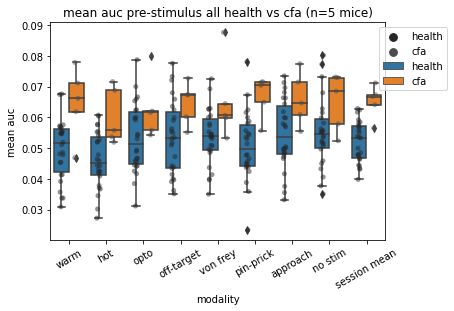

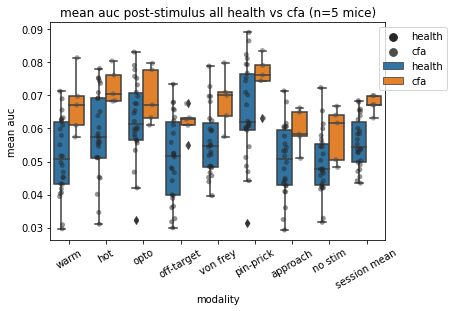

In [34]:
# PLOT MEAN AUC BASELINE CFA MICE ONLY 
auc_metrics_pre = auc_metrics_pre.loc[auc_metrics_pre['mouse'].isin(cfa_mice)]
auc_metrics_post = auc_metrics_post.loc[auc_metrics_post['mouse'].isin(cfa_mice)]

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc pre-stimulus all health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc pre-stimulus all health vs cfa nis5.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean auc", hue='cfa', data=auc_metrics_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='mean auc post-stimulus all health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean auc post-stimulus all health vs cfa nis5.png'), bbox_inches='tight')
plt.show()

In [35]:
# Non-parametric t-test for each modality pair: pre-stimulus auc (all sessions with cfa) vs cfa
warm_h = auc_metrics_pre[(auc_metrics_pre['modality']=='warm') & (auc_metrics_pre['cfa']=='health')]['mean auc']
hot_h = auc_metrics_pre[(auc_metrics_pre['modality']=='hot') & (auc_metrics_pre['cfa']=='health')]['mean auc']
off_target_h = auc_metrics_pre[(auc_metrics_pre['modality']=='off-target') & (auc_metrics_pre['cfa']=='health')]['mean auc']
von_frey_h = auc_metrics_pre[(auc_metrics_pre['modality']=='von frey') & (auc_metrics_pre['cfa']=='health')]['mean auc']
pin_prick_h = auc_metrics_pre[(auc_metrics_pre['modality']=='pin-prick') & (auc_metrics_pre['cfa']=='health')]['mean auc']
approach_h = auc_metrics_pre[(auc_metrics_pre['modality']=='approach') & (auc_metrics_pre['cfa']=='health')]['mean auc']
opto_h = auc_metrics_pre[(auc_metrics_pre['modality']=='opto') & (auc_metrics_pre['cfa']=='health')]['mean auc']
no_stim_h = auc_metrics_pre[(auc_metrics_pre['modality']=='no stim') & (auc_metrics_pre['cfa']=='health')]['mean auc']
ses_mean_h = auc_metrics_pre[(auc_metrics_pre['modality']=='session mean') & (auc_metrics_pre['cfa']=='health')]['mean auc']

warm_c = auc_metrics_pre[(auc_metrics_pre['modality']=='warm') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
hot_c = auc_metrics_pre[(auc_metrics_pre['modality']=='hot') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
off_target_c = auc_metrics_pre[(auc_metrics_pre['modality']=='off-target') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
von_frey_c = auc_metrics_pre[(auc_metrics_pre['modality']=='von frey') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
pin_prick_c = auc_metrics_pre[(auc_metrics_pre['modality']=='pin-prick') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
approach_c = auc_metrics_pre[(auc_metrics_pre['modality']=='approach') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
opto_c = auc_metrics_pre[(auc_metrics_pre['modality']=='opto') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
no_stim_c = auc_metrics_pre[(auc_metrics_pre['modality']=='no stim') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']
ses_mean_c = auc_metrics_pre[(auc_metrics_pre['modality']=='session mean') & (auc_metrics_pre['cfa']=='cfa')]['mean auc']



U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim pre-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('ses_mean pre-stim auc: ', U1, p)

warm pre-stim auc:  21.0 0.015843588702320624
hot pre-stim auc:  21.0 0.015843588702320624
off_target pre-stim auc:  28.0 0.047624933053186665
von_frey pre-stim auc:  29.0 0.054675683151767684
pin_prick pre-stim auc:  12.0 0.002318861050785411
approach pre-stim auc:  28.0 0.047624933053186665
opto pre-stim auc:  35.0 0.11523680044258464
no_stim pre-stim auc:  32.0 0.08075992725603404
ses_mean pre-stim auc:  9.0 0.0009769820670821783


In [36]:
# Non-parametric t-test for each modality pair: post-stimulus auc (all sessions with cfa) vs cfa
warm_h = auc_metrics_post[(auc_metrics_post['modality']=='warm') & (auc_metrics_post['cfa']=='health')]['mean auc']
hot_h = auc_metrics_post[(auc_metrics_post['modality']=='hot') & (auc_metrics_post['cfa']=='health')]['mean auc']
off_target_h = auc_metrics_post[(auc_metrics_post['modality']=='off-target') & (auc_metrics_post['cfa']=='health')]['mean auc']
von_frey_h = auc_metrics_post[(auc_metrics_post['modality']=='von frey') & (auc_metrics_post['cfa']=='health')]['mean auc']
pin_prick_h = auc_metrics_post[(auc_metrics_post['modality']=='pin-prick') & (auc_metrics_post['cfa']=='health')]['mean auc']
approach_h = auc_metrics_post[(auc_metrics_post['modality']=='approach') & (auc_metrics_post['cfa']=='health')]['mean auc']
opto_h = auc_metrics_post[(auc_metrics_post['modality']=='opto') & (auc_metrics_post['cfa']=='health')]['mean auc']
no_stim_h = auc_metrics_post[(auc_metrics_post['modality']=='no stim') & (auc_metrics_post['cfa']=='health')]['mean auc']
ses_mean_h = auc_metrics_post[(auc_metrics_post['modality']=='session mean') & (auc_metrics_post['cfa']=='health')]['mean auc']



warm_c = auc_metrics_post[(auc_metrics_post['modality']=='warm') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
hot_c = auc_metrics_post[(auc_metrics_post['modality']=='hot') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
off_target_c = auc_metrics_post[(auc_metrics_post['modality']=='off-target') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
von_frey_c = auc_metrics_post[(auc_metrics_post['modality']=='von frey') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
pin_prick_c = auc_metrics_post[(auc_metrics_post['modality']=='pin-prick') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
approach_c = auc_metrics_post[(auc_metrics_post['modality']=='approach') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
opto_c = auc_metrics_post[(auc_metrics_post['modality']=='opto') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
no_stim_c = auc_metrics_post[(auc_metrics_post['modality']=='no stim') & (auc_metrics_post['cfa']=='cfa')]['mean auc']
ses_mean_c = auc_metrics_post[(auc_metrics_post['modality']=='session mean') & (auc_metrics_post['cfa']=='cfa')]['mean auc']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim post-stim auc: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean post-stim auc: ', U1, p)




warm post-stim auc:  21.0 0.015843588702320624
hot post-stim auc:  23.0 0.022270482782162423
off_target post-stim auc:  33.0 0.09124777089181983
von_frey post-stim auc:  19.0 0.010982220103465931
pin_prick post-stim auc:  35.0 0.11523680044258464
approach post-stim auc:  32.0 0.08075992725603404
opto post-stim auc:  38.0 0.15938932735373224
no_stim post-stim auc:  26.0 0.035653960014360456
session mean post-stim auc:  10.0 0.0013301081154251343


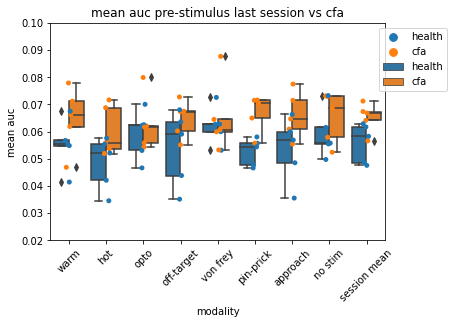

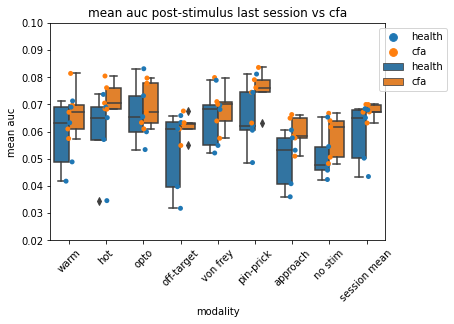

In [37]:
# PLOT LAST SESSION VS CFA
df_pre = auc_metrics_last.loc[auc_metrics_last['pre/post']=='pre']
df_post = auc_metrics_last.loc[auc_metrics_last['pre/post']=='post']

ax = sns.stripplot(x='modality', y='mean auc', hue='cfa', data=df_pre)
ax = sns.boxplot(x='modality', y='mean auc', hue='cfa', data=df_pre)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.1)
plt.title('mean auc pre-stimulus last session vs cfa')
plt.savefig(os.path.join(output_path, 'mean auc pre_stim last vs cfa.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x='modality', y='mean auc', hue='cfa', data=df_post)
ax = sns.boxplot(x='modality', y='mean auc', hue='cfa', data=df_post)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0.02, 0.1)
plt.title('mean auc post-stimulus last session vs cfa')
plt.savefig(os.path.join(output_path, 'mean auc last session vs cfa.png'), bbox_inches='tight')
plt.show()

In [38]:
# Non-parametric paired t-test for each modality pair: pre-stimulus auc (last session) vs cfa
warm_h = df_pre[(df_pre['modality']=='warm') & (df_pre['cfa']=='health')]['mean auc']
hot_h = df_pre[(df_pre['modality']=='hot') & (df_pre['cfa']=='health')]['mean auc']
off_target_h = df_pre[(df_pre['modality']=='off-target') & (df_pre['cfa']=='health')]['mean auc']
von_frey_h = df_pre[(df_pre['modality']=='von frey') & (df_pre['cfa']=='health')]['mean auc']
pin_prick_h = df_pre[(df_pre['modality']=='pin-prick') & (df_pre['cfa']=='health')]['mean auc']
approach_h = df_pre[(df_pre['modality']=='approach') & (df_pre['cfa']=='health')]['mean auc']
opto_h = df_pre[(df_pre['modality']=='opto') & (df_pre['cfa']=='health')]['mean auc']
no_stim_h = df_pre[(df_pre['modality']=='no stim') & (df_pre['cfa']=='health')]['mean auc']
ses_mean_h = df_pre[(df_pre['modality']=='session mean') & (df_pre['cfa']=='health')]['mean auc']

warm_c = df_pre[(df_pre['modality']=='warm') & (df_pre['cfa']=='cfa')]['mean auc']
hot_c = df_pre[(df_pre['modality']=='hot') & (df_pre['cfa']=='cfa')]['mean auc']
off_target_c = df_pre[(df_pre['modality']=='off-target') & (df_pre['cfa']=='cfa')]['mean auc']
von_frey_c = df_pre[(df_pre['modality']=='von frey') & (df_pre['cfa']=='cfa')]['mean auc']
pin_prick_c = df_pre[(df_pre['modality']=='pin-prick') & (df_pre['cfa']=='cfa')]['mean auc']
approach_c = df_pre[(df_pre['modality']=='approach') & (df_pre['cfa']=='cfa')]['mean auc']
opto_c = df_pre[(df_pre['modality']=='opto') & (df_pre['cfa']=='cfa')]['mean auc']
no_stim_c = df_pre[(df_pre['modality']=='no stim') & (df_pre['cfa']=='cfa')]['mean auc']
ses_mean_c = df_pre[(df_pre['modality']=='session mean') & (df_pre['cfa']=='cfa')]['mean auc']



from scipy.stats import wilcoxon

d = np.array(warm_h) - np.array(warm_c)
res = wilcoxon(d)
print('warm pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(hot_h) - np.array(hot_c)
res = wilcoxon(d)
print('hot pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(off_target_h) - np.array(off_target_c)
res = wilcoxon(d)
print('off target pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(von_frey_h) - np.array(von_frey_c)
res = wilcoxon(d)
print('von frey pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(pin_prick_h) - np.array(pin_prick_c)
res = wilcoxon(d)
print('pin-prick pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(approach_h) - np.array(approach_c)
res = wilcoxon(d)
print('approach pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(opto_h) - np.array(opto_c)
res = wilcoxon(d)
print('opto pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(no_stim_h) - np.array(no_stim_c)
res = wilcoxon(d)
print('no stimulation pre-stim auc: ', res.statistic, res.pvalue)

d = np.array(ses_mean_h) - np.array(ses_mean_c)
res = wilcoxon(d)
print('session mean pre-stim auc: ', res.statistic, res.pvalue)





warm pre-stim auc:  3.0 0.3125
hot pre-stim auc:  3.0 0.3125
off target pre-stim auc:  5.0 0.625
von frey pre-stim auc:  6.0 0.8125
pin-prick pre-stim auc:  0.0 0.0625
approach pre-stim auc:  2.0 0.1875
opto pre-stim auc:  5.0 0.625
no stimulation pre-stim auc:  6.0 0.8125
session mean pre-stim auc:  3.0 0.3125


In [28]:
# Non-parametric paired t-test for each modality pair: post-stimulus auc (last session) vs cfa
warm_h = df_post[(df_post['modality']=='warm') & (df_post['cfa']=='health')]['mean auc']
hot_h = df_post[(df_post['modality']=='hot') & (df_post['cfa']=='health')]['mean auc']
off_target_h = df_post[(df_post['modality']=='off-target') & (df_post['cfa']=='health')]['mean auc']
von_frey_h = df_post[(df_post['modality']=='von frey') & (df_post['cfa']=='health')]['mean auc']
pin_prick_h = df_post[(df_post['modality']=='pin-prick') & (df_post['cfa']=='health')]['mean auc']
approach_h = df_post[(df_post['modality']=='approach') & (df_post['cfa']=='health')]['mean auc']
opto_h = df_post[(df_post['modality']=='opto') & (df_post['cfa']=='health')]['mean auc']
no_stim_h = df_post[(df_post['modality']=='no stim') & (df_post['cfa']=='health')]['mean auc']
ses_mean_h = df_post[(df_post['modality']=='session mean') & (df_post['cfa']=='health')]['mean auc']


warm_c = df_post[(df_post['modality']=='warm') & (df_post['cfa']=='cfa')]['mean auc']
hot_c = df_post[(df_post['modality']=='hot') & (df_post['cfa']=='cfa')]['mean auc']
off_target_c = df_post[(df_post['modality']=='off-target') & (df_post['cfa']=='cfa')]['mean auc']
von_frey_c = df_post[(df_post['modality']=='von frey') & (df_post['cfa']=='cfa')]['mean auc']
pin_prick_c = df_post[(df_post['modality']=='pin-prick') & (df_post['cfa']=='cfa')]['mean auc']
approach_c = df_post[(df_post['modality']=='approach') & (df_post['cfa']=='cfa')]['mean auc']
opto_c = df_post[(df_post['modality']=='opto') & (df_post['cfa']=='cfa')]['mean auc']
no_stim_c = df_post[(df_post['modality']=='no stim') & (df_post['cfa']=='cfa')]['mean auc']
ses_mean_c = df_post[(df_post['modality']=='session mean') & (df_post['cfa']=='cfa')]['mean auc']



from scipy.stats import wilcoxon

d = np.array(warm_h) - np.array(warm_c)
res = wilcoxon(d)
print('warm post-stim auc: ', res.statistic, res.pvalue)

d = np.array(hot_h) - np.array(hot_c)
res = wilcoxon(d)
print('hot post-stim auc: ', res.statistic, res.pvalue)

d = np.array(off_target_h) - np.array(off_target_c)
res = wilcoxon(d)
print('off target post-stim auc: ', res.statistic, res.pvalue)

d = np.array(von_frey_h) - np.array(von_frey_c)
res = wilcoxon(d)
print('von frey post-stim auc: ', res.statistic, res.pvalue)

d = np.array(pin_prick_h) - np.array(pin_prick_c)
res = wilcoxon(d)
print('pin-prick post-stim auc: ', res.statistic, res.pvalue)

d = np.array(approach_h) - np.array(approach_c)
res = wilcoxon(d)
print('approach post-stim auc: ', res.statistic, res.pvalue)

d = np.array(opto_h) - np.array(opto_c)
res = wilcoxon(d)
print('opto post-stim auc: ', res.statistic, res.pvalue)

d = np.array(no_stim_h) - np.array(no_stim_c)
res = wilcoxon(d)
print('no stimulation post-stim auc: ', res.statistic, res.pvalue)

d = np.array(ses_mean_h) - np.array(ses_mean_c)
res = wilcoxon(d)
print('session mean post-stim auc: ', res.statistic, res.pvalue)




warm post-stim auc:  3.0 0.3125
hot post-stim auc:  2.0 0.1875
off target post-stim auc:  4.0 0.4375
von frey post-stim auc:  6.0 0.8125
pin-prick post-stim auc:  2.0 0.1875
approach post-stim auc:  3.0 0.3125
opto post-stim auc:  6.0 0.8125
no stimulation post-stim auc:  4.0 0.4375
session mean post-stim auc:  3.0 0.3125
